In [51]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine, text
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load env varibales
load_dotenv()

True

In [11]:
db_host = os.getenv("DB_HOST")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")
db_database = os.getenv("DB_NAME")

In [12]:
db_params = {
    'host': db_host,
    'user': db_user,
    'password': db_password,
    'port': db_port,
    'database': db_database
}

In [13]:
engine = create_engine(f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}")

In [14]:
table_name = 'xdr_data'

In [15]:
df = pd.read_sql_table(table_name, con=engine)

## Explore the given dataset

In [16]:
# Return number of columns and rows
df.shape

(150001, 55)

In [17]:
# Returns all no null row count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [18]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [19]:
# return missing values of each column
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [20]:
# return the total missing value in the dataset
missing_value = df.isnull().sum().sum()
missing_value

1031392

In [21]:
np.product(df.shape)

8250055

In [22]:
# calculate missing value in percent to decide what to do with them
missing_value_in_percent = missing_value / np.product(df.shape)  * 100
missing_value_in_percent

12.501637867868759

In [23]:
# return the first five records of the data
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [24]:
df["Handset Type"]

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000                           None
Name: Handset Type, Length: 150001, dtype: object

In [25]:
# Check for skew to find out about data distribution
numeric_columns = df.select_dtypes(include=['float', 'int'])
# numeric_columns.skew(axis=0).round(1)
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

In [26]:
object_columns  = df.select_dtypes(include=["object"]).columns

## Data Cleaning

In [27]:
# check for column skew and add mean or median 
for column_name in numeric_columns:
    column_skew = df[column_name].skew().round()

    if column_skew > 0:
        fill_value = df[column_name].median()
    elif column_skew < 0:
        fill_value = df[column_name].median()
    else:
        fill_value = df[column_name].mean()

    df[column_name].fillna(fill_value, inplace=True)

In [28]:
#set undeifined value with mode
# Assuminng there is no phone brand called undefined
undefined_rows  = df[df['Handset Type'] == 'undefined']
handest_type_mode = df['Handset Type'].mode()[0]
df.loc[undefined_rows .index, 'Handset Type'] = handest_type_mode

## Univariate Analysis

In [47]:
# This is a univariant analaysis for Total Dl in bytes
data_range = df["Total DL (Bytes)"].max() - df["Total DL (Bytes)"].min()
q1 = df["Total DL (Bytes)"].quantile(0.25)
q3 = df["Total DL (Bytes)"].quantile(0.75)
variance = df["Total DL (Bytes)"].var()
std_deviation = df["Total DL (Bytes)"].std()
iqr = q3 - q1
print(f"{column_name} Range: {data_range}")
print(f"{column_name} IQR: {iqr}")
print(f"{column_name} Variance: {variance}")
print(f"{column_name} Standard Deviation: {std_deviation}")

Total DL (Bytes) Range: 895855575.0
Total DL (Bytes) IQR: 422597965.0
Total DL (Bytes) Variance: 5.96053457370928e+16
Total DL (Bytes) Standard Deviation: 244142060.56534544


## Graph Univariate Analysis

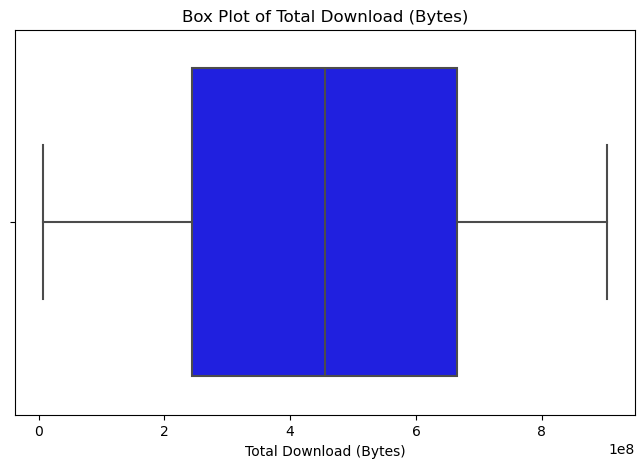

In [55]:
# Histogram
# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Total DL (Bytes)"], color='blue')
plt.title("Box Plot of Total Download (Bytes)")
plt.xlabel("Total Download (Bytes)")
plt.show()

## Bivariant Analysis

In [60]:
# Todo

## Tasks

In [29]:
# 1. Top 10 handsets used by the customers
handset_counts = df.groupby('Handset Type')['MSISDN/Number'].count()
handset_count_sorted = handset_counts.sort_values(ascending=False)
handset_count_sorted.head(10)

Handset Type
Huawei B528S-23A                28739
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: MSISDN/Number, dtype: int64

In [30]:
# 2.Top 3 handset manufacturers
df["Handset Manufacturer"].value_counts().head(3)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [31]:
# 3. Top 5 handsets per top 3 handset manufacturer
top3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

#Step 2: Filter the DataFrame for the top 3 manufacturers
df_top3 = df[df['Handset Manufacturer'].isin(top3_manufacturers)]


top5_handsets_per_manufacturer = (
    df_top3.groupby(['Handset Manufacturer', 'Handset Type'])
           ['MSISDN/Number']
           .count()
           .reset_index(name='Count')
           .sort_values(['Handset Manufacturer', 'Count'], ascending=[True, False])
           .groupby('Handset Manufacturer')
           .head(5)
)

top5_handsets_per_manufacturer

,Handset Manufacturer,Handset Type,Count
35,Apple,Apple iPhone 6S (A1688),9419
31,Apple,Apple iPhone 6 (A1586),9023
41,Apple,Apple iPhone 7 (A1778),6326
55,Apple,Apple iPhone Se (A1723),5187
48,Apple,Apple iPhone 8 (A1905),4993
83,Huawei,Huawei B528S-23A,19752
104,Huawei,Huawei E5180,2079
183,Huawei,Huawei P20 Lite Huawei Nova 3E,2021
182,Huawei,Huawei P20,1480
224,Huawei,Huawei Y6 2018,997


In [61]:
# recommendation
# I recommend tthe marketing team of the compnay in  apple case to make more Apple iPhone 6S (A1688) and improve products like Apple iPhone 8 (A1905)

# Task 2

In [33]:
# 1. number of xDR sessions 
xdr_session_per_user = df.groupby(['MSISDN/Number'])['Bearer Id'].count()
xdr_session_per_user

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64

In [34]:
# 2. session duration
session_duration = df.groupby(['MSISDN/Number'])['Dur. (ms)'].sum()
session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

In [35]:
# 3. total download (DL) and upload (UL) data
total_data_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum', 
    'Total UL (Bytes)': 'sum'
})

total_data_per_user.columns = ['Total Download (DL)', 'Total Upload (UL)']
total_data_per_user

,Total Download (DL),Total Upload (UL)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197021e+12,1.948281e+08,37295915.0


In [37]:
# 4. Total data volume (in Bytes) during this session for each application
